In [85]:
import cv2
import keras
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

import struct

mypath = "Dataset\label_2\\"

Dataset\label_2\000020.png


TypeError: Image data of dtype object cannot be converted to float

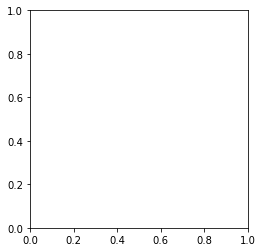

In [87]:
pathToImg = mypath+"Dataset\label_2\\000020.png"
im = cv2.imread(pathToImg)
print(pathToImg)

plt.imshow(im)

In [83]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
breakcount = 0
for file in onlyfiles:
    f = open(mypath+file,"r")
    for line in f:
        breakcount+=1
        print(line)
        if breakcount==4: break

Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01

Truck 0.00 0 -1.57 599.41 156.40 629.75 189.25 2.85 2.63 12.34 0.47 1.49 69.44 -1.56

Car 0.00 0 1.85 387.63 181.54 423.81 203.12 1.67 1.87 3.69 -16.53 2.39 58.49 1.57

Cyclist 0.00 3 -1.65 676.60 163.95 688.98 193.93 1.86 0.60 2.02 4.59 1.32 45.84 -1.55

Misc 0.00 0 -1.82 804.79 167.34 995.43 327.94 1.63 1.48 2.37 3.23 1.59 8.55 -1.47

Car 0.00 0 -1.67 657.39 190.13 700.07 223.39 1.41 1.58 4.36 3.18 2.27 34.38 -1.58

Car 0.00 0 1.55 614.24 181.78 727.31 284.77 1.57 1.73 4.15 1.00 1.75 13.22 1.62

DontCare -1 -1 -10 5.00 229.89 214.12 367.61 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 522.25 202.35 547.77 219.71 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 1.96 280.38 185.10 344.90 215.59 1.49 1.76 4.01 -15.71 2.16 38.26 1.57

Car 0.00 0 1.88 365.14 184.54 406.11 205.20 1.38 1.80 3.41 -15.89 2.23 51.17 1.58

DontCare -1 -1 -10 402.27 166.69 477.31 197.98 -1 -1 -1 -1000 -1000 -1000 -10

DontCare


Van 0.00 2 2.33 421.45 165.38 501.45 200.66 1.97 1.77 4.86 -8.74 1.57 42.77 2.13

Pedestrian 0.00 0 -1.76 868.33 164.92 890.59 235.81 1.65 0.50 0.50 6.32 1.47 17.06 -1.41

Car 0.00 1 -0.80 444.17 173.30 522.30 205.63 1.49 1.53 3.80 -6.17 1.53 35.28 -0.97

Car 0.00 1 -1.01 581.13 173.89 633.85 198.94 1.49 1.56 3.65 -0.14 1.57 44.92 -1.01

DontCare -1 -1 -10 663.04 170.45 735.28 187.34 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 781.57 171.18 815.27 186.93 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 837.67 170.18 851.44 181.96 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 918.93 164.70 1215.06 179.99 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 0.00 168.77 114.63 228.19 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.57 583.18 177.03 609.74 203.28 1.65 1.67 3.64 -0.92 1.94 47.64 -1.59

Tram 0.00 0 1.87 176.05 142.90 398.14 219.23 3.59 2.69 35.24 -20.47 2.38 51.76 1.50

DontCare -1 -1 -10 508.24 174.90 528.46 189.53 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -1

DontCare -1 -1 -10 417.17 168.62 476.61 189.91 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 656.48 173.33 670.40 183.99 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 709.56 166.69 725.23 197.98 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.00 1 2.63 945.88 153.78 1030.55 314.71 1.71 0.56 0.89 4.25 1.43 7.87 3.11

Car 0.00 0 -1.76 696.02 188.46 800.12 261.42 1.37 1.54 3.56 2.92 1.47 15.85 -1.59

Car 0.86 0 -0.93 0.00 201.49 305.44 375.00 1.46 1.63 3.82 -3.61 1.63 4.58 -1.57

Car 0.00 0 -1.31 370.04 182.11 490.39 266.25 1.57 1.61 3.42 -3.67 1.51 15.26 -1.54

Car 0.00 0 -1.67 644.51 180.29 687.19 212.25 1.46 1.66 4.04 2.76 1.23 35.21 -1.59

Car 0.00 1 -1.11 154.25 186.36 314.70 264.52 1.45 1.57 3.60 -7.89 1.49 15.51 -1.57

Car 0.00 1 -1.40 451.19 183.77 523.30 234.35 1.47 1.61 4.16 -3.86 1.44 23.46 -1.56

Car 0.00 2 -1.26 339.00 187.26 415.90 231.06 1.40 1.53 3.74 -8.18 1.50 25.73 -1.57

Car 0.00 1 -1.34 405.21 184.42 456.04 216.26 1.41 1.52 3.80 -8.49 1.40 34.64 -1.58

Van 0.00

Car 0.87 0 -1.54 1067.59 187.01 1241.00 374.00 1.40 1.65 4.18 4.27 1.52 4.56 -0.82

Car 0.00 0 -1.29 838.52 163.91 1111.22 356.67 1.59 1.65 3.94 4.15 1.53 7.96 -0.82

Car 0.00 2 -1.11 763.86 173.53 985.22 284.59 1.48 1.73 4.06 4.35 1.50 11.65 -0.76

Car 0.00 2 -0.99 728.04 166.95 903.14 255.35 1.63 1.61 3.96 4.36 1.53 15.17 -0.71

Car 0.00 2 -0.96 721.62 175.30 850.40 238.46 1.49 1.63 3.36 4.61 1.57 18.89 -0.72

Car 0.00 2 -0.90 696.96 174.28 821.96 224.09 1.41 1.60 4.09 4.68 1.47 22.46 -0.70

Car 0.00 1 1.67 525.35 177.56 546.43 192.20 1.37 1.64 3.92 -7.22 1.85 70.45 1.57

Car 0.00 0 1.76 461.34 181.95 503.86 210.95 1.38 1.47 3.62 -6.47 1.86 36.77 1.58

Car 0.00 1 -0.83 667.67 172.26 754.59 206.74 1.49 1.59 4.09 4.65 1.48 33.13 -0.69

Car 0.00 2 -0.89 650.91 173.55 720.64 200.23 1.40 1.63 4.05 4.20 1.45 39.83 -0.79

Van 0.00 2 -0.92 639.38 168.48 696.03 194.49 1.88 1.82 4.64 4.39 1.58 54.51 -0.84

Car 0.00 2 1.77 462.38 175.94 493.50 196.90 1.67 1.68 4.49 -11.00 1.95 60.26 1.59

Car 0

Car 0.00 2 -1.66 663.44 174.69 707.80 210.87 1.44 1.58 3.28 3.38 1.21 30.23 -1.54

Car 0.00 0 1.67 560.24 171.85 583.08 188.69 1.40 1.54 4.50 -2.86 0.67 61.98 1.63

DontCare -1 -1 -10 604.82 169.60 615.13 180.93 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 632.10 170.82 645.33 178.23 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.57 560.81 172.76 676.87 282.46 1.56 1.65 3.69 0.10 1.59 12.20 -1.56

Car 0.65 0 -1.37 975.81 158.94 1241.00 374.00 1.54 1.73 4.04 4.33 1.48 5.07 -0.70

Car 0.00 2 -1.22 857.63 175.82 1113.74 321.72 1.38 1.56 3.80 4.64 1.43 8.74 -0.75

Car 0.92 1 2.21 0.00 172.82 46.63 273.53 1.57 1.71 4.32 -10.28 1.57 10.14 1.43

Van 0.00 1 1.70 503.57 170.77 540.23 199.91 2.02 1.99 5.56 -6.46 1.91 53.32 1.58

Pedestrian 0.00 0 -0.84 775.24 165.37 801.24 220.71 1.64 0.63 0.86 5.30 1.42 21.87 -0.60

Pedestrian 0.00 2 1.98 929.16 168.19 941.42 207.29 1.49 0.55 0.78 12.43 1.32 27.96 2.39

Pedestrian 0.00 2 2.61 1017.79 161.37 1031.60 213.70 1.81 0.51 0.34 14.43 1.41 25.18 3.


Car 0.00 1 2.97 648.30 173.95 728.05 202.25 1.51 1.65 4.21 4.32 1.60 40.50 3.07

DontCare -1 -1 -10 729.35 192.73 803.35 243.81 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.93 758.32 183.04 1001.06 317.66 1.45 1.71 3.93 3.34 1.61 9.93 -1.61

Car 0.00 0 1.88 234.11 179.57 450.78 333.14 1.73 1.65 3.96 -3.53 1.83 10.19 1.55

Car 0.00 1 -1.83 690.65 164.01 830.62 257.99 1.78 1.89 4.37 3.10 1.64 16.01 -1.64

Car 0.00 1 1.75 381.81 181.37 486.41 273.15 1.68 1.51 3.29 -3.58 1.86 15.00 1.52

Car 0.00 2 1.74 427.55 190.13 506.27 242.77 1.39 1.66 4.04 -4.29 1.95 22.01 1.55

Car 0.00 1 1.69 496.29 178.63 533.55 212.22 1.86 1.67 4.13 -5.55 2.21 42.30 1.56

DontCare -1 -1 -10 519.98 175.02 558.56 204.23 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 588.73 171.90 632.52 195.90 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -0.01 667.06 174.99 912.02 269.00 1.57 1.65 4.09 3.16 1.63 13.26 0.22

Pedestrian 0.00 1 -2.17 1082.85 124.78 1177.52 316.32 1.67 0.70 0.44 4.65 1.25 6.52 -1.57

Cyclist 0.00 0


DontCare -1 -1 -10 510.60 180.23 553.35 213.60 -1 -1 -1 -1000 -1000 -1000 -10

Van 0.00 0 -1.89 740.07 143.61 963.76 307.59 1.84 1.71 3.72 3.16 1.41 9.99 -1.60

Tram 0.00 2 -0.13 318.25 141.15 508.57 197.33 3.68 2.79 12.71 -13.09 0.97 50.69 -0.38

Person_sitting 0.00 1 -1.41 455.98 186.85 502.24 262.86 1.32 0.70 0.75 -2.24 1.43 13.02 -1.58

Person_sitting 0.00 1 -1.36 419.18 188.06 466.63 262.77 1.30 0.68 0.76 -2.90 1.43 13.04 -1.58

Person_sitting 0.00 2 1.79 442.74 189.48 480.92 258.20 1.29 0.59 0.64 -2.74 1.46 13.97 1.59

Person_sitting 0.00 2 1.74 464.38 185.08 495.31 245.22 1.31 0.57 0.59 -2.74 1.39 16.04 1.57

Pedestrian 0.00 0 -1.43 331.66 164.51 367.32 266.68 1.82 0.64 0.58 -4.69 1.52 13.20 -1.77

Pedestrian 0.00 2 1.94 319.14 164.42 359.45 260.67 1.82 0.56 0.51 -5.07 1.50 13.84 1.59

DontCare -1 -1 -10 660.58 174.55 716.72 226.53 -1 -1 -1 -1000 -1000 -1000 -10

Van 0.00 0 1.62 510.05 159.30 543.12 197.94 2.84 2.22 6.86 -6.51 1.89 56.92 1.51

Car 0.00 2 2.65 827.40 181.85 883.


Car 0.00 1 1.30 200.16 150.92 273.43 205.79 2.21 1.76 4.11 -16.20 1.36 31.16 0.82

Car 0.00 1 -1.97 257.88 163.95 328.64 203.64 1.75 1.57 4.07 -14.88 1.39 33.71 -2.38

Car 0.00 0 -2.02 322.87 163.54 403.86 197.30 1.54 1.71 5.03 -12.16 1.15 35.28 -2.35

Van 0.00 1 0.93 506.07 155.15 578.91 195.18 2.14 1.77 4.44 -3.90 1.23 40.85 0.83

Car 0.00 2 -2.26 544.77 163.10 599.32 189.67 1.53 1.41 3.40 -2.34 0.99 43.34 -2.31

Car 0.00 1 -2.45 588.90 161.79 646.06 189.42 1.69 1.61 3.36 0.43 1.04 45.87 -2.44

Car 0.00 1 -2.44 620.63 166.90 682.47 188.32 1.44 1.62 4.26 2.85 1.07 50.44 -2.39

Car 0.00 1 -2.36 659.15 166.78 704.10 188.26 1.48 1.61 2.86 5.05 1.08 51.28 -2.26

Car 0.00 1 -2.46 680.08 167.14 731.16 187.32 1.41 1.50 3.48 6.87 1.04 52.22 -2.33

Car 0.00 1 0.73 703.06 165.17 761.80 185.97 1.48 1.48 4.41 9.01 0.96 53.48 0.90

Van 0.00 3 0.48 743.72 155.63 803.76 184.01 2.17 1.89 4.27 13.07 0.87 57.76 0.70

Car 0.00 2 0.46 770.14 163.06 822.84 182.16 1.50 1.67 3.84 15.33 0.75 59.45 0.71

Car


Car 0.00 1 -1.35 407.78 182.23 459.64 214.74 1.45 1.61 3.72 -8.29 1.32 34.42 -1.58

Car 0.00 2 -1.17 255.45 183.62 335.37 222.61 1.42 1.51 3.84 -12.42 1.38 28.76 -1.57

Car 0.00 1 -1.46 503.36 182.23 545.43 213.98 1.48 1.64 3.81 -4.13 1.34 35.87 -1.57

Car 0.00 1 -1.49 528.18 181.92 557.21 203.39 1.37 1.61 4.21 -4.39 1.16 48.82 -1.58

Car 0.00 2 -1.03 53.17 187.46 200.65 250.80 1.42 1.56 3.39 -12.15 1.50 18.37 -1.61

Van 0.94 0 2.23 0.00 43.54 298.13 374.00 2.48 2.02 6.78 -4.76 1.73 5.40 1.53

Car 0.00 0 1.95 279.50 185.88 471.36 276.19 1.37 1.78 4.65 -4.20 1.65 13.67 1.66

Pedestrian 0.00 1 2.98 463.56 166.02 500.00 254.09 1.79 0.66 0.94 -2.70 1.65 15.13 2.81

Pedestrian 0.00 0 0.59 510.77 170.72 534.58 240.39 1.77 0.55 0.79 -2.32 1.72 18.73 0.47

Pedestrian 0.00 1 0.96 517.10 167.73 540.97 239.00 1.86 0.64 0.84 -2.10 1.73 19.35 0.86

Cyclist 0.00 0 -3.06 708.93 167.93 761.34 217.81 1.75 0.65 1.79 4.46 1.59 25.90 -2.89

Car 0.24 3 2.27 1129.27 161.98 1241.00 206.72 1.48 1.51 4.35 20.


Pedestrian 0.00 0 1.14 627.19 143.59 665.52 248.54 1.68 0.45 0.75 0.67 1.09 11.73 1.19

Pedestrian 0.00 0 1.48 543.70 130.80 572.37 220.06 1.95 0.63 0.74 -1.09 0.86 15.89 1.42

Pedestrian 0.00 0 1.26 575.39 142.61 604.39 220.36 1.71 0.60 0.52 -0.32 0.87 15.89 1.24

Pedestrian 0.00 2 1.28 636.24 147.42 659.81 218.47 1.59 0.46 0.67 1.03 0.85 16.22 1.35

Cyclist 0.00 0 2.51 436.48 145.56 476.88 191.99 1.74 0.57 1.44 -5.73 0.43 27.27 2.30

DontCare -1 -1 -10 513.01 139.87 533.68 179.03 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 240.79 142.42 434.87 213.46 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 0.00 88.88 263.56 368.00 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 715.09 122.66 974.19 138.23 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.63 0 2.10 0.00 143.86 257.20 373.00 1.77 0.66 0.90 -2.01 1.64 2.98 1.54

Pedestrian 0.00 0 -1.58 633.79 164.25 667.12 258.46 1.76 0.76 1.02 0.82 1.44 13.98 -1.53

Pedestrian 0.00 0 2.71 444.23 170.08 472.45 235.37 1.78 0.82 0.80 -4.1


Pedestrian 0.00 0 1.16 728.67 147.62 768.75 257.73 1.79 0.79 0.96 2.35 1.25 12.08 1.35

Cyclist 0.00 3 1.70 239.06 158.52 291.06 253.68 1.94 0.76 1.70 -7.36 1.49 15.33 1.27

Cyclist 0.88 3 -1.00 0.00 119.88 201.10 369.00 1.83 0.71 1.70 -2.39 1.64 2.74 -1.66

Pedestrian 0.00 1 1.22 1096.19 137.27 1111.09 182.58 1.96 0.69 0.50 21.67 0.09 30.97 1.83

Pedestrian 0.00 1 -2.20 1114.11 140.76 1133.99 180.37 1.65 0.58 0.80 21.93 -0.01 30.01 -1.58

DontCare -1 -1 -10 410.37 166.01 422.12 189.23 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 0.00 157.09 161.56 368.00 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 328.35 173.71 387.99 202.52 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 282.10 187.07 312.96 221.01 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.59 556.06 185.21 714.24 334.53 1.49 1.60 3.83 0.21 1.67 9.30 -1.57

Car 0.62 0 -1.06 0.00 180.02 378.37 374.00 1.59 1.65 4.04 -3.32 1.65 5.58 -1.57

Truck 1.00 0 -2.14 759.17 0.00 1241.00 374.00 3.28 2.45 13.60 3.79 1.63 5.64 -


Cyclist 0.00 0 -0.97 626.35 171.73 669.43 223.24 1.82 0.59 1.89 1.37 1.78 26.35 -0.92

Pedestrian 0.00 0 2.62 968.49 165.03 997.25 236.09 1.67 0.50 0.61 8.82 1.49 17.30 3.09

Pedestrian 0.00 0 -1.93 900.34 166.03 925.10 229.71 1.69 0.59 0.83 8.19 1.52 19.67 -1.54

Person_sitting 0.00 0 2.85 817.74 178.57 863.31 223.86 1.34 0.51 1.19 6.90 1.52 21.73 -3.13

Person_sitting 0.00 0 2.89 806.86 181.60 853.33 221.76 1.26 0.50 1.33 7.03 1.55 23.20 -3.10

Car 0.00 2 -2.69 374.61 179.59 458.28 208.14 1.44 1.62 3.91 -10.15 1.81 37.82 -2.95

DontCare -1 -1 -10 1093.70 170.83 1240.00 339.96 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 688.75 163.07 702.63 189.89 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 320.67 161.13 357.19 220.29 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.35 0 2.00 0.00 192.85 379.29 374.00 1.45 1.64 4.21 -3.60 1.68 6.73 1.52

Car 0.00 0 1.39 667.67 175.73 766.65 253.18 1.62 1.58 3.89 2.38 1.71 17.18 1.52

Car 0.00 0 1.72 460.77 182.05 532.37 231.70 1.45 1.67 4.43 -3.66


Cyclist 0.00 0 1.25 584.74 158.88 654.08 250.76 1.83 0.89 1.94 0.24 1.40 15.17 1.27

Cyclist 0.00 0 1.72 463.21 168.17 487.68 211.04 1.73 0.73 1.76 -5.42 1.23 29.62 1.54

Pedestrian 0.00 0 -1.62 181.49 148.94 198.81 196.38 1.99 0.73 0.53 -17.53 0.66 30.08 -2.14

Pedestrian 0.00 0 2.18 83.16 148.10 125.36 241.30 1.88 0.71 1.28 -10.58 1.22 14.95 1.57

Pedestrian 0.00 0 1.99 234.25 154.71 257.33 212.28 1.91 0.66 0.99 -12.20 1.06 24.11 1.53

Pedestrian 0.00 0 1.92 201.81 151.39 225.22 209.79 1.93 0.73 0.96 -13.15 0.96 23.91 1.42

Pedestrian 0.00 0 0.59 667.44 153.00 721.47 305.64 1.89 0.87 1.09 1.16 1.55 9.43 0.72

Pedestrian 0.00 1 0.65 706.85 150.56 772.98 294.79 1.89 0.88 1.00 1.88 1.49 9.91 0.84

Pedestrian 0.00 2 0.47 758.68 142.72 879.84 310.59 1.89 0.88 1.13 2.58 1.46 8.66 0.75

Pedestrian 0.58 0 0.11 1108.93 142.20 1223.00 369.00 1.84 0.78 1.12 4.43 1.57 5.19 0.79

Pedestrian 0.00 1 0.47 772.82 146.60 851.05 332.95 1.84 0.79 1.03 2.30 1.51 7.63 0.76

DontCare -1 -1 -10 419.93 155.

Car 0.00 0 -1.57 575.59 180.23 611.55 213.02 1.60 1.76 3.84 -0.77 1.35 37.38 -1.59

Car 0.00 0 -1.15 185.71 191.01 337.38 264.97 1.39 1.62 3.73 -7.59 1.56 16.09 -1.58

Car 0.00 0 -1.32 338.47 193.63 488.73 288.12 1.37 1.61 4.21 -3.40 1.57 13.24 -1.57

Car 0.00 2 -1.27 337.57 186.00 419.46 232.05 1.45 1.64 3.86 -7.99 1.50 25.28 -1.57

Car 0.00 1 -1.41 451.35 186.05 512.23 224.52 1.38 1.71 4.49 -5.01 1.44 28.96 -1.58

Van 0.00 0 -1.49 504.28 160.27 547.07 208.58 2.74 2.09 5.96 -4.96 1.31 44.07 -1.60

Car 0.88 1 -0.82 0.00 191.28 52.44 271.52 1.49 1.59 4.32 -12.29 1.64 12.66 -1.58

Car 0.00 2 -1.09 163.47 190.91 274.63 237.82 1.33 1.55 3.83 -12.57 1.56 23.45 -1.57

Car 0.00 1 -1.18 263.06 182.01 343.54 223.38 1.63 1.71 4.13 -12.97 1.51 30.84 -1.58

DontCare -1 -1 -10 0.00 208.83 41.66 275.70 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 1.86 286.77 202.49 457.47 323.13 1.51 1.55 3.92 -3.72 2.07 11.83 1.56

Car 0.32 0 -2.03 812.34 201.45 1211.64 374.00 1.47 1.56 3.16 2.95 1.77 6.14 -1.60

Car

Van 0.12 1 -2.21 1092.37 138.60 1241.00 196.89 1.78 1.87 4.98 19.03 0.75 24.63 -1.56

DontCare -1 -1 -10 627.94 169.53 648.29 190.52 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 734.03 158.54 793.84 182.12 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 669.34 165.65 679.34 173.06 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.00 0 -2.02 331.70 157.65 368.04 262.45 1.88 0.69 0.47 -4.68 1.45 13.28 -2.36

Pedestrian 0.12 3 2.21 77.23 154.29 149.23 373.00 1.77 0.67 0.91 -3.83 1.58 5.61 1.63

Pedestrian 0.00 0 2.30 629.10 173.93 658.76 233.98 1.51 1.01 0.97 0.76 1.32 18.79 2.33

Pedestrian 0.00 0 0.29 504.79 169.17 527.45 239.09 1.66 0.65 0.72 -2.23 1.37 17.42 0.16

Pedestrian 0.00 0 1.56 558.83 166.16 580.17 223.58 1.72 0.88 0.90 -1.20 1.26 22.04 1.50

Pedestrian 0.00 2 -1.55 630.78 163.49 645.77 214.45 1.77 0.94 0.93 1.21 1.15 25.52 -1.51

Pedestrian 0.00 1 1.63 617.52 168.52 628.19 205.89 1.73 0.67 0.83 0.94 1.13 33.79 1.65

Van 0.09 0 -1.88 747.08 0.00 1219.79 373.00 2.56 2.06 5

Car 0.52 0 -1.18 1133.98 169.65 1241.00 273.25 1.65 1.67 3.64 11.31 1.60 12.92 -0.47

Van 0.00 1 2.68 570.02 152.79 764.72 245.20 2.01 1.66 4.35 1.34 1.57 17.27 2.76

Car 0.00 1 2.21 982.67 170.48 1120.21 226.64 1.59 1.55 3.93 13.52 1.54 22.15 2.75

Car 0.00 1 -2.94 415.51 178.00 492.83 207.86 1.49 1.64 3.70 -8.16 1.78 37.83 3.13

DontCare -1 -1 -10 604.00 166.30 627.58 188.59 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 486.92 165.01 556.43 193.12 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 974.02 157.89 1057.76 174.36 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 744.38 163.71 762.14 195.70 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 3 1.88 9.43 210.26 241.03 342.95 1.43 1.74 3.63 -6.90 2.07 10.67 1.32

Car 0.00 0 -1.69 529.07 189.01 589.38 231.64 1.38 1.73 3.97 -1.98 2.01 26.53 -1.76

Car 0.00 1 -2.88 717.26 167.60 831.21 216.55 1.74 1.58 3.90 6.15 1.58 27.23 -2.66

Car 0.00 2 -1.67 518.90 186.62 564.38 223.59 1.50 1.62 4.11 -3.15 2.14 32.28 -1.76

Car 0.00 0 1.74 348

Car 0.00 0 1.93 227.13 177.91 466.57 318.23 1.62 1.75 4.30 -3.54 1.71 10.52 1.62

Car 0.00 2 1.92 189.78 181.55 362.98 267.62 1.47 1.73 4.48 -6.63 1.67 14.84 1.51

Car 0.00 1 -1.25 425.28 184.75 494.12 225.29 1.39 1.59 3.17 -5.57 1.85 26.91 -1.46

Pedestrian 0.00 0 -1.52 660.70 173.49 685.36 233.43 1.73 0.84 0.86 1.97 1.50 21.21 -1.43

Pedestrian 0.00 0 -1.55 684.26 170.34 708.60 233.06 1.81 0.90 0.95 2.63 1.49 21.24 -1.43

Pedestrian 0.00 0 -1.45 500.87 167.90 529.20 231.99 1.78 0.92 1.01 -2.61 1.40 20.52 -1.58

DontCare -1 -1 -10 1037.30 176.18 1200.08 313.81 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 838.70 185.86 966.01 331.87 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 709.74 169.09 742.91 206.78 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 459.56 169.09 476.61 226.77 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 574.33 171.67 654.57 207.42 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.59 584.03 177.14 600.63 190.18 1.26 1.60 3.56 -1.80 1.70 72.31 -1.61




Car 0.00 1 1.81 486.39 181.06 531.01 205.11 1.40 1.68 4.76 -6.29 1.93 45.13 1.67

Tram 0.00 2 1.19 596.85 156.69 662.95 188.47 3.46 2.57 14.66 2.09 1.79 85.95 1.22

DontCare -1 -1 -10 0.00 198.00 40.40 268.80 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 294.15 176.00 351.37 207.99 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 532.85 176.65 563.55 199.58 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 789.66 146.89 1238.89 177.59 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.00 0 2.69 568.15 172.03 592.63 224.98 1.61 0.87 1.03 -0.89 1.32 22.57 2.64

Tram 0.00 2 -0.10 327.25 127.80 483.11 213.61 3.68 2.81 6.69 -9.11 1.34 33.34 -0.37

Tram 0.00 1 -0.24 471.76 126.94 549.26 205.78 3.65 2.80 3.14 -4.47 1.11 35.12 -0.37

Tram 0.00 2 -0.44 534.11 122.14 775.56 198.97 3.68 2.79 12.71 3.00 0.77 37.97 -0.37

Person_sitting 0.98 1 -2.93 1220.49 239.72 1237.00 373.00 1.18 0.56 0.85 3.41 1.47 3.26 -2.17

Person_sitting 0.33 3 1.48 1067.51 217.41 1214.33 373.00 1.26 0.64 0.79 3.33 1.52

Car 0.18 0 -1.19 112.12 187.04 463.44 374.00 1.77 1.75 4.67 -3.11 1.96 8.11 -1.54

Car 0.00 0 1.74 456.44 187.69 546.71 257.75 1.60 1.68 3.94 -2.77 2.02 18.98 1.60

Car 0.00 0 1.63 564.04 186.37 592.97 209.52 1.42 1.66 4.11 -2.08 2.34 47.93 1.59

DontCare -1 -1 -10 591.71 168.89 614.00 187.94 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.00 2 -0.24 660.45 145.86 680.34 203.19 1.76 0.53 0.64 1.95 0.70 22.08 -0.16

Pedestrian 0.00 1 -1.55 278.08 138.75 316.92 260.02 1.92 0.66 0.67 -5.04 1.25 11.61 -1.95

Pedestrian 0.47 3 0.57 1001.11 183.47 1212.55 369.00 1.52 0.53 0.68 2.42 1.54 3.51 1.13

Pedestrian 0.71 1 0.45 1062.39 174.69 1223.00 369.00 1.64 0.68 1.00 3.11 1.61 3.76 1.10

Pedestrian 0.00 2 -1.91 585.25 148.92 608.86 211.43 1.64 0.59 0.90 -0.17 0.81 19.03 -1.91

Pedestrian 0.00 0 1.11 657.50 141.35 703.83 279.21 1.87 0.70 0.73 1.04 1.34 10.06 1.21

Pedestrian 0.00 2 1.12 640.49 137.40 700.76 257.26 1.81 0.57 0.96 0.99 1.16 11.22 1.21

Pedestrian 0.00 1 0.92 594.61 142.71 640.09 278.


DontCare -1 -1 -10 591.71 176.00 650.22 191.17 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 847.23 172.12 861.75 179.53 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 1.95 840.05 178.15 967.44 243.89 1.48 1.51 4.35 7.60 1.63 18.54 2.34

Car 0.00 1 1.88 923.37 179.09 1027.49 230.13 1.42 1.68 4.29 11.45 1.63 22.55 2.34

Car 0.00 1 1.81 1012.28 179.78 1080.08 217.82 1.36 1.40 3.80 16.99 1.65 28.09 2.35

Van 0.00 1 1.64 1119.58 154.90 1170.47 199.34 2.52 2.10 5.64 32.52 1.52 43.80 2.27

Car 0.00 0 1.66 1094.74 176.17 1139.28 205.04 1.44 1.65 2.96 26.62 1.63 37.89 2.27

DontCare -1 -1 -10 1172.00 166.95 1236.98 202.17 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.00 1 -0.09 635.23 144.40 728.23 309.78 1.89 0.48 1.20 0.81 1.48 8.38 0.00

Tram 0.00 1 -0.00 23.51 101.03 560.92 261.09 3.71 2.80 13.02 -7.81 1.78 20.30 -0.37

Tram 0.00 2 -0.36 537.74 107.40 662.51 224.50 3.48 2.75 3.22 -0.11 1.26 23.18 -0.37

Tram 0.00 2 -0.55 627.77 99.81 837.69 217.13 3.68 2.81 6.69 4.57 1.08 25.07 -0.38

Tra

Car 0.00 0 -1.57 561.06 171.72 629.36 234.01 1.60 1.76 3.84 -0.40 1.25 20.59 -1.59

Truck 0.17 0 -1.35 132.15 0.00 532.99 334.02 4.05 2.50 16.44 -3.67 1.44 15.50 -1.58

Car 0.00 2 -1.49 500.92 179.49 548.49 212.95 1.30 1.61 4.39 -3.46 1.06 30.35 -1.60

DontCare -1 -1 -10 535.65 161.00 570.85 170.99 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.54 581.26 177.64 642.51 236.86 1.61 1.66 3.20 0.06 1.77 21.40 -1.54

Tram 1.00 0 0.80 902.97 0.00 1241.00 348.86 3.66 2.28 12.78 6.59 1.53 6.76 1.55

Tram 0.00 0 1.30 749.34 68.77 988.46 246.91 3.64 2.32 14.73 6.71 1.59 22.18 1.59

Tram 0.00 0 1.41 722.20 121.52 808.03 210.40 3.61 2.32 10.04 7.11 1.58 34.54 1.61

Tram 0.00 0 1.47 706.54 135.35 766.60 201.98 3.63 2.34 12.83 7.78 1.65 45.95 1.64

Car 0.00 0 1.69 491.69 173.41 544.46 216.57 1.66 1.67 4.49 -3.81 1.72 30.32 1.56

Car 0.00 0 -1.16 274.18 180.60 321.53 205.80 1.56 1.72 3.09 -20.20 2.07 46.74 -1.57

Car 0.00 1 1.66 535.65 176.43 563.89 198.44 1.46 1.59 4.12 -4.19 1.73 50.44 1.58

Car 0.0

Car 0.89 3 2.28 0.00 217.05 154.29 374.00 1.51 1.53 3.80 -5.68 1.97 5.88 1.53

Car 0.00 1 -0.13 671.62 165.92 902.23 259.92 1.69 1.76 4.12 3.23 1.60 14.04 0.09

Van 0.00 1 1.73 458.40 159.19 559.52 244.44 2.13 1.91 6.40 -2.81 1.83 21.37 1.60

Car 0.00 1 2.04 85.66 195.98 324.25 326.81 1.50 1.58 3.42 -5.64 1.88 10.47 1.56

Car 0.00 1 -1.69 644.78 177.74 689.46 216.21 1.57 1.54 3.22 2.40 1.80 31.35 -1.61

Car 0.00 2 -1.68 630.12 174.14 670.42 210.93 1.74 1.60 3.86 1.95 1.83 36.32 -1.62

Pedestrian 0.00 0 0.55 584.97 172.95 590.64 194.60 1.90 0.42 1.04 -2.00 1.92 63.77 0.52

Pedestrian 0.00 1 0.64 590.29 173.84 596.29 194.88 1.87 0.50 0.90 -1.68 1.96 64.51 0.62

Car 0.00 1 1.63 545.82 174.74 563.79 193.65 1.86 1.57 3.83 -5.60 2.08 73.50 1.56

Pedestrian 0.00 1 -2.11 1036.36 143.11 1087.36 293.18 1.73 0.79 0.90 5.44 1.29 8.77 -1.57

Van 0.00 2 -1.75 690.27 162.00 780.03 237.21 1.84 1.71 3.72 3.51 1.36 19.57 -1.58

DontCare -1 -1 -10 453.76 167.16 475.33 226.77 -1 -1 -1 -1000 -1000 -1000 -1

Car 0.00 1 -0.92 684.53 167.97 773.40 206.79 1.54 1.72 3.88 5.07 1.36 30.66 -0.76

Car 0.00 2 -0.89 667.92 170.91 726.43 198.45 1.52 1.49 3.46 5.03 1.43 41.63 -0.77

Car 0.00 2 -0.85 655.17 171.13 710.12 192.82 1.39 1.61 3.65 4.84 1.29 48.05 -0.75

Car 0.76 0 2.33 0.00 178.05 108.28 281.76 1.67 1.68 4.49 -10.70 1.76 11.79 1.60

Car 0.00 1 2.11 101.04 176.88 263.27 249.94 1.63 1.58 4.20 -10.67 1.75 18.31 1.58

Car 0.00 0 1.98 260.37 184.89 356.16 228.11 1.34 1.57 4.01 -10.40 1.78 25.07 1.59

Car 0.00 1 1.86 409.84 176.32 462.18 203.42 1.45 1.65 4.63 -9.94 1.67 41.43 1.63

Car 0.00 1 1.80 441.54 170.83 479.47 199.76 1.81 1.59 3.93 -9.84 1.71 47.60 1.59

Car 0.00 1 1.87 479.96 173.01 515.13 193.21 1.56 1.62 4.19 -9.08 1.60 58.46 1.72

Car 0.00 1 1.96 523.90 173.32 557.50 188.46 1.42 1.67 4.53 -6.76 1.49 70.71 1.86

Car 0.00 3 2.20 9.80 181.22 135.97 239.24 1.47 1.29 2.95 -14.74 1.70 19.91 1.57

Car 0.00 0 -1.66 636.96 177.98 670.58 205.12 1.38 1.49 3.32 2.28 1.67 38.71 -1.60

Car 0.00 0 -

Car 0.00 0 -1.57 588.22 171.86 623.70 206.02 1.66 1.73 3.05 -0.23 1.64 37.03 -1.57

Tram 0.00 0 -1.51 524.50 148.93 563.25 192.48 3.62 2.60 15.21 -6.03 1.71 68.01 -1.60

Truck 0.00 1 -2.00 726.51 161.70 806.19 193.95 2.85 2.63 12.34 14.94 1.94 70.42 -1.79

DontCare -1 -1 -10 457.81 155.95 516.32 187.94 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 242.40 173.42 263.39 209.94 -1 -1 -1 -1000 -1000 -1000 -10

Truck 0.00 0 -1.56 617.19 151.56 662.44 200.52 2.85 2.63 12.34 2.09 1.68 48.63 -1.51

Car 0.00 0 1.91 324.56 187.46 376.28 211.16 1.39 1.82 4.11 -16.56 2.35 46.15 1.57

DontCare -1 -1 -10 423.53 176.65 496.92 200.88 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 536.73 171.48 601.71 184.71 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.23 118.60 189.39 450.21 373.07 1.33 1.71 4.09 -3.00 1.54 7.57 -1.59

Van 1.00 1 -2.22 794.16 0.00 1185.24 374.00 2.58 1.87 6.44 2.76 1.47 3.61 -1.61

Car 0.00 1 -1.73 651.60 165.38 727.66 221.36 1.49 1.56 4.34 2.23 1.32 21.60 -1.62

Car 0.00 1 

Car 0.00 0 1.93 160.35 182.57 406.93 336.99 1.70 1.72 4.11 -4.29 1.85 10.16 1.54

DontCare -1 -1 -10 482.39 173.42 498.86 184.71 -1 -1 -1 -1000 -1000 -1000 -10

Truck 0.00 0 -1.56 559.37 106.87 649.93 216.58 3.52 2.89 10.81 -0.19 1.46 28.74 -1.57

Car 0.23 0 2.25 0.00 194.18 93.89 232.70 1.37 1.36 4.44 -23.41 2.29 29.47 1.58

Car 0.00 1 2.16 69.66 189.96 153.65 225.20 1.51 1.47 3.64 -23.50 2.35 34.12 1.56

DontCare -1 -1 -10 420.29 172.12 441.28 184.06 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 1.98 266.06 169.85 382.57 248.48 2.17 1.71 4.33 -8.65 2.11 22.18 1.61

Car 0.00 0 1.89 384.99 183.38 454.14 227.97 1.73 1.60 4.11 -8.02 2.20 30.63 1.64

Car 0.00 0 1.83 452.57 183.40 500.93 211.93 1.47 1.63 4.11 -7.35 2.07 39.98 1.65

Tram 0.00 0 -1.62 719.24 155.44 749.95 188.21 3.33 2.37 23.29 14.51 1.67 85.38 -1.45

Car 0.00 1 1.80 488.10 175.97 526.60 205.23 1.80 1.61 3.83 -6.62 2.02 46.70 1.66

DontCare -1 -1 -10 528.32 176.00 608.83 201.52 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10


DontCare -1 -1 -10 605.30 170.18 620.47 185.35 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.02 3 1.96 0.00 183.43 322.70 366.13 1.57 1.67 4.14 -4.76 1.61 8.46 1.46

Cyclist 0.06 0 1.88 184.64 151.74 351.77 373.00 1.80 0.79 1.86 -2.94 1.57 6.49 1.46

Pedestrian 0.00 0 1.05 652.32 147.33 689.32 237.15 1.81 1.06 0.73 1.31 1.12 15.01 1.13

Pedestrian 0.00 0 -1.51 470.96 166.15 489.63 215.07 1.73 0.84 0.86 -4.52 1.19 25.97 -1.68

Pedestrian 0.00 0 -1.55 488.57 164.29 506.90 215.21 1.81 0.90 0.95 -3.91 1.20 26.13 -1.70

Pedestrian 0.00 0 -1.30 343.40 166.76 368.40 222.41 1.78 0.92 1.01 -8.33 1.31 23.58 -1.64

DontCare -1 -1 -10 413.78 168.45 422.45 195.18 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 432.48 164.58 457.92 199.69 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.58 972.90 184.29 1196.01 354.42 1.33 1.59 3.48 4.87 1.48 7.71 -1.03

Car 0.00 0 -1.34 873.61 170.38 961.30 221.68 1.47 1.60 4.41 9.80 1.41 22.90 -0.94

Car 0.00 2 -1.46 1053.61 162.21 1159.58 237.83 1.63 1.69 3.88 12.09 1.4

Car 0.00 0 -1.63 613.52 176.29 643.18 199.23 1.41 1.65 4.28 1.13 1.66 47.19 -1.61

Van 0.00 2 0.09 439.59 164.80 526.25 199.56 1.99 1.80 4.96 -7.60 1.55 43.36 -0.08

Car 0.00 1 -2.81 174.67 179.48 393.35 250.97 1.47 1.53 4.21 -7.25 1.65 16.25 3.06

Car 0.00 0 -1.81 664.16 170.87 809.52 277.50 1.64 1.62 4.20 2.11 1.64 13.38 -1.65

Car 0.00 0 1.86 277.06 192.20 472.98 324.55 1.35 1.47 3.43 -2.91 1.65 9.49 1.57

Truck 0.00 2 -1.61 601.09 164.12 632.89 193.23 2.40 2.50 6.54 0.53 1.72 63.35 -1.60

DontCare -1 -1 -10 528.32 168.89 592.65 191.82 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.59 553.33 171.49 712.01 324.37 1.66 1.73 3.05 0.20 1.67 9.46 -1.57

Cyclist 0.00 0 -1.29 345.09 175.63 361.46 201.23 1.78 0.60 1.81 -18.22 1.98 51.17 -1.63

Car 0.02 3 2.17 0.00 189.94 209.46 268.95 1.47 1.72 4.39 -11.21 1.90 16.33 1.58

DontCare -1 -1 -10 523.79 160.48 539.61 170.48 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 503.09 159.83 516.97 175.65 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1

Truck 0.00 0 -1.58 598.62 159.58 629.27 192.77 2.85 2.63 12.34 0.29 1.78 68.81 -1.58

Cyclist 0.00 1 2.07 275.02 184.70 295.67 210.83 1.63 0.56 1.46 -20.82 2.40 46.24 1.65

Car 0.00 0 1.95 313.89 187.69 367.40 216.60 1.67 1.87 3.69 -16.72 2.62 44.91 1.59

Cyclist 0.00 3 -1.68 682.38 165.09 697.07 198.26 1.86 0.60 2.02 4.56 1.43 41.53 -1.57

DontCare -1 -1 -10 492.90 180.21 512.28 192.79 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 520.91 180.01 532.55 189.32 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 553.06 178.27 584.08 185.03 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.56 592.97 175.07 616.19 197.43 1.66 1.73 3.05 -0.43 1.85 55.77 -1.57

Truck 0.00 0 -1.62 623.72 160.92 655.29 190.55 2.85 2.63 12.34 2.99 1.77 76.34 -1.58

Misc 0.00 1 1.89 339.11 168.77 381.88 206.89 2.74 2.14 3.05 -18.61 2.48 53.90 1.56

Car 0.00 1 1.88 368.40 182.74 412.84 208.45 1.60 1.77 3.58 -14.43 2.27 47.54 1.59

DontCare -1 -1 -10 444.39 177.30 465.71 193.77 -1 -1 -1 -1000 -1000 -1000 -10

Dont


DontCare -1 -1 -10 382.29 171.48 428.84 188.92 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 462.82 174.39 482.20 181.15 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 1.69 480.23 195.42 548.26 247.84 1.42 1.66 4.11 -3.00 2.19 23.04 1.56

Car 0.00 0 1.59 567.57 175.67 588.56 197.33 1.97 1.87 4.53 -3.01 2.26 68.60 1.55

DontCare -1 -1 -10 596.73 172.45 608.34 182.12 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 1 -2.85 339.49 165.49 476.14 229.98 1.86 1.69 3.69 -6.16 1.68 22.11 -3.12

Car 0.00 2 -2.90 376.78 170.11 498.54 218.25 1.68 1.69 4.07 -6.33 1.61 26.63 -3.13

Car 0.00 0 -1.78 784.83 150.27 840.89 189.51 2.04 1.99 4.82 11.20 0.89 40.26 -1.52

Car 0.00 2 -2.94 412.89 172.94 514.10 208.41 1.48 1.56 4.12 -6.42 1.51 31.71 -3.14

Car 0.00 2 -2.96 434.24 164.98 530.09 200.84 1.74 1.75 4.57 -6.51 1.38 36.87 -3.13

DontCare -1 -1 -10 744.21 155.95 766.50 173.39 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 853.86 147.22 937.28 186.00 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 5

Car 0.00 2 -2.30 434.17 172.42 529.33 213.57 1.49 1.66 3.55 -5.02 1.50 27.86 -2.48

Van 0.41 3 -2.03 784.49 53.38 1241.00 374.00 2.38 2.08 5.75 3.49 1.70 7.12 -1.59

Car 0.00 2 -1.83 741.29 181.47 897.42 274.37 1.47 1.73 4.22 3.72 1.65 13.75 -1.57

Car 0.00 0 -1.68 666.35 177.82 715.59 212.81 1.40 1.66 4.08 3.41 1.64 31.34 -1.57

Van 0.00 3 -1.64 639.74 159.76 674.00 195.46 2.42 2.03 5.49 3.30 1.57 52.10 -1.58

Car 0.00 2 -1.55 588.86 171.84 625.30 205.08 1.52 1.67 3.61 -0.14 1.50 35.08 -1.55

Van 0.45 3 2.19 0.00 123.26 190.22 288.81 2.14 1.71 4.52 -8.82 1.53 11.41 1.55

Car 0.00 1 2.13 82.93 177.79 191.50 221.80 1.28 1.40 3.13 -14.84 1.45 22.75 1.56

Car 0.00 2 2.06 242.67 174.31 318.14 205.41 1.31 1.52 3.73 -14.88 1.40 32.69 1.64

DontCare -1 -1 -10 525.89 168.56 570.50 198.61 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.00 0 0.38 248.76 146.86 335.67 330.04 1.81 0.77 1.14 -3.33 1.48 7.44 -0.02

Car 0.88 0 -0.95 0.00 225.87 249.37 374.00 1.39 1.81 3.46 -4.18 1.87 4.88 -1.63

Car 0.0

Truck 0.00 0 -1.57 580.23 146.00 631.07 207.60 3.52 2.89 10.81 -0.27 2.04 46.98 -1.57

Car 0.00 0 1.81 405.42 187.92 435.72 204.91 1.48 1.79 4.15 -17.73 2.93 67.65 1.56

Car 0.00 0 1.69 497.91 183.90 547.28 222.52 1.45 1.53 3.98 -3.58 1.93 29.82 1.58

Car 0.31 0 2.06 0.00 186.33 378.73 374.00 1.65 1.56 3.98 -3.73 1.80 6.96 1.58

Cyclist 0.00 0 1.98 361.05 184.91 387.46 222.71 1.60 0.54 1.50 -10.33 2.13 31.53 1.66

Car 0.00 0 -1.57 572.89 173.69 615.06 212.13 1.60 1.76 3.84 -0.64 1.11 32.16 -1.59

Car 0.86 0 -0.88 0.00 210.34 241.93 375.00 1.35 1.57 3.72 -4.34 1.61 5.01 -1.57

Car 0.06 1 -0.98 0.00 187.23 217.70 283.99 1.44 1.58 3.66 -8.84 1.51 12.91 -1.57

Car 0.00 0 -1.20 216.37 183.90 400.07 284.27 1.49 1.64 3.95 -5.17 1.49 12.91 -1.57

Van 0.00 2 -1.21 279.18 169.85 381.84 233.84 1.78 1.66 3.84 -8.41 1.34 22.06 -1.57

Misc 0.00 0 -1.36 404.13 153.14 491.87 238.84 2.23 1.88 2.54 -4.43 1.39 20.11 -1.58

Van 0.00 1 -1.40 438.25 150.88 518.68 226.08 2.38 1.98 4.65 -4.43 1.28 25.21 -1.58

Car 0.00 0 1.70 505.78 178.45 551.62 212.19 1.45 1.62 3.83 -3.72 1.72 33.29 1.59

Pedestrian 0.00 0 1.08 742.38 167.83 748.38 198.47 1.74 0.47 0.55 7.48 1.46 41.40 1.26

DontCare -1 -1 -10 544.33 177.30 569.53 196.68 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.18 165.76 192.28 443.14 362.91 1.41 1.54 3.36 -2.98 1.56 7.89 -1.54

Car 0.00 0 -1.52 487.68 173.43 577.21 255.04 1.52 1.67 4.38 -1.41 1.38 15.78 -1.61

Car 0.00 2 -1.44 492.51 174.44 561.65 231.71 1.56 1.59 3.65 -2.17 1.37 21.61 -1.55

Car 0.00 0 -1.59 599.68 174.45 642.41 217.31 1.48 1.47 2.23 0.68 1.24 26.12 -1.57

Car 0.00 1 1.85 368.76 181.41 453.66 228.66 1.45 1.60 4.50 -6.42 1.46 24.67 1.59

Car 0.00 2 -1.46 568.30 175.85 609.54 209.80 1.50 1.49 4.19 -0.54 1.25 34.11 -1.48

Car 0.59 0 -2.07 885.56 188.80 1241.00 374.00 1.45 1.74 4.10 3.82 1.61 5.99 -1.52

Car 0.25 0 2.05 0.00 181.03 387.44 374.00 1.54 1.68 3.79 -3.57 1.63 6.74 1.58

Car 0.00 1 1.88 322.43 184.31 478.48 289.43 1.49 1.52 3.35 -3.39 1.70 12.13 1.61

Car 0.0


Pedestrian 0.00 0 1.28 817.13 167.09 843.79 246.99 1.67 0.78 0.95 4.90 1.37 15.53 1.58

Pedestrian 0.00 1 1.35 791.64 166.27 817.64 244.64 1.74 0.72 0.77 4.35 1.40 16.37 1.60

Pedestrian 0.00 0 -1.60 650.79 170.30 676.12 238.28 1.89 0.96 0.95 1.53 1.58 20.49 -1.53

Pedestrian 0.00 1 -1.61 727.12 174.97 755.45 280.35 1.68 0.64 0.91 2.26 1.58 11.96 -1.43

Pedestrian 0.00 2 -1.66 678.45 176.75 721.62 260.53 1.71 0.80 0.94 2.05 1.62 15.22 -1.54

Pedestrian 0.00 1 -1.73 762.14 165.01 791.47 249.03 1.80 0.83 0.92 3.58 1.45 15.90 -1.52

Pedestrian 0.00 2 -1.81 777.73 163.67 799.35 234.37 1.83 0.78 0.94 5.03 1.37 19.15 -1.57

Car 0.00 0 1.68 558.93 178.53 601.54 211.89 1.57 1.67 4.14 -1.01 1.43 36.16 1.65

Pedestrian 0.13 3 -2.11 16.29 177.94 73.96 307.20 1.81 0.73 0.84 -8.35 1.76 10.54 -2.78

DontCare -1 -1 -10 617.05 175.38 630.56 186.95 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 70.59 233.41 143.09 359.11 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 1.60 448.33 196.11 520.26 266.37 1

Car 0.00 0 1.81 304.39 197.38 488.18 321.28 1.42 1.66 4.11 -3.05 1.85 11.01 1.55

Car 0.00 0 1.60 553.51 168.41 579.51 194.88 1.97 1.87 4.53 -3.38 1.67 56.54 1.54

DontCare -1 -1 -10 586.65 165.65 603.36 180.28 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 0.29 37.83 188.86 405.96 304.34 1.45 1.68 4.53 -5.52 1.73 10.75 -0.17

DontCare -1 -1 -10 866.85 197.94 1027.31 286.52 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -0.91 9.69 173.14 120.34 216.22 1.52 1.50 3.51 -20.66 1.56 27.47 -1.55

Car 0.00 0 1.97 324.80 174.27 362.13 192.98 1.47 1.82 3.03 -21.77 1.61 58.99 1.62

Car 0.00 0 -1.56 574.76 173.57 614.95 213.62 1.62 1.63 4.50 -0.69 1.68 31.79 -1.59

DontCare -1 -1 -10 368.94 162.52 431.48 185.48 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 459.56 167.73 478.35 181.31 -1 -1 -1 -1000 -1000 -1000 -10

Car 1.00 0 2.53 0.00 187.88 182.62 374.00 1.48 1.64 3.95 -3.28 1.55 2.05 1.58

Car 1.00 0 -2.45 983.05 222.75 1241.00 374.00 1.35 1.64 3.84 2.77 1.61 1.94 -1.56

Car 0.00 0 1.35 704.56 18


Car 1.00 0 -2.47 916.87 170.03 1241.00 374.00 1.63 1.69 3.88 2.37 1.61 1.66 -1.59

Car 0.00 1 -1.25 260.60 184.41 502.52 330.87 1.46 1.68 4.10 -2.69 1.63 9.40 -1.52

Car 0.00 0 -1.71 658.92 177.94 730.28 229.85 1.49 1.64 4.17 2.56 1.67 23.02 -1.60

Car 0.04 1 -1.92 743.16 181.92 1075.14 374.00 1.41 1.56 3.97 2.49 1.52 7.21 -1.60

Car 0.00 2 -1.35 375.44 181.64 507.59 266.05 1.44 1.65 4.25 -3.28 1.64 14.68 -1.56

Pedestrian 0.00 2 -1.23 334.04 166.15 367.13 274.36 1.83 0.60 0.39 -4.52 1.72 12.45 -1.57

Pedestrian 0.00 2 -1.26 371.14 167.08 388.92 252.49 1.81 0.34 0.32 -5.01 1.70 15.52 -1.57

Car 0.00 0 -1.55 536.55 175.92 573.47 209.68 1.60 1.75 3.89 -2.77 1.78 36.52 -1.62

Car 0.00 2 -1.69 641.98 177.18 685.68 212.00 1.59 1.64 4.03 2.55 1.82 35.33 -1.62

Pedestrian 0.00 2 -1.28 377.03 169.99 399.77 257.88 1.78 0.40 0.43 -4.61 1.73 14.88 -1.57

Car 0.00 2 -1.60 631.24 173.43 657.40 199.94 1.83 1.75 4.52 2.43 1.90 52.41 -1.55

DontCare -1 -1 -10 615.81 177.10 628.35 190.68 -1 -1 -1 -100

Car 0.00 2 -0.98 680.59 174.65 731.90 202.40 1.61 1.60 3.11 5.82 1.73 43.64 -0.85

Car 0.00 1 -0.39 613.14 169.76 658.25 183.25 1.38 1.60 4.49 2.72 1.08 76.51 -0.35

Car 0.00 1 -0.23 504.87 172.97 543.29 185.70 1.29 1.47 3.77 -9.05 1.33 75.93 -0.35

DontCare -1 -1 -10 540.81 177.10 574.18 202.14 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.22 0 -2.18 440.96 203.92 785.26 374.00 1.47 1.58 3.55 -0.24 1.83 7.15 -2.21

Car 0.00 1 -1.96 322.02 209.53 540.88 334.00 1.37 1.70 4.38 -3.01 2.03 11.20 -2.22

Car 0.00 1 -1.86 259.61 212.33 397.54 302.14 1.40 1.56 3.91 -5.86 2.29 14.65 -2.23

Car 0.00 1 -1.78 197.86 205.84 300.93 280.72 1.60 1.65 3.77 -9.43 2.51 18.63 -2.24

Car 0.00 2 -1.66 141.84 211.99 200.77 254.34 1.37 1.61 4.26 -17.47 3.01 28.59 -2.21

DontCare -1 -1 -10 1.23 213.56 138.77 247.98 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.53 3 -2.49 0.00 193.46 199.58 335.59 1.42 1.55 3.35 -6.83 1.69 8.19 3.12

Car 0.00 2 0.50 70.41 189.29 359.41 294.44 1.43 1.49 3.56 -5.88 1.71 10.91 0.01

Car 0.00 2 0.


Car 0.00 0 1.60 567.87 178.85 586.34 193.80 1.44 1.72 4.14 -3.30 2.06 72.68 1.56

Car 0.00 0 -1.73 653.64 179.16 675.64 196.70 1.48 1.36 3.51 4.75 2.04 63.24 -1.66

Van 0.00 0 1.77 409.35 170.62 459.49 209.92 2.50 2.20 5.78 -11.88 2.39 49.15 1.53

DontCare -1 -1 -10 602.27 170.85 620.02 187.56 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 581.44 175.02 588.77 185.48 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 0.04 630.02 176.26 826.62 267.50 1.55 1.66 3.37 2.13 1.64 13.39 0.19

Car 0.00 0 1.75 500.70 174.51 546.08 202.61 1.42 1.78 3.62 -4.14 1.07 38.60 1.64

DontCare -1 -1 -10 600.32 167.28 667.89 186.02 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.77 713.17 188.78 866.14 306.19 1.53 1.59 3.64 2.65 1.82 11.59 -1.55

Car 0.00 1 1.71 527.66 178.64 587.51 228.17 1.63 1.60 3.73 -1.83 1.85 25.76 1.64

Car 0.00 2 -1.62 702.30 187.63 772.97 255.06 1.45 1.50 3.26 2.99 1.84 17.60 -1.45

Car 0.00 2 -1.70 683.59 179.48 743.89 231.97 1.59 1.49 3.34 3.31 1.82 23.75 -1.57

Car 0.00 2 -1.68 667


Car 0.00 2 -2.86 332.84 180.39 457.53 228.63 1.43 1.57 3.46 -6.74 1.69 22.73 3.14

Van 0.00 2 -2.91 358.00 164.37 493.37 223.31 1.94 1.75 4.27 -6.38 1.68 25.16 3.13

Car 0.00 0 -2.28 720.66 176.24 807.52 213.62 1.42 1.56 3.48 6.22 1.59 29.60 -2.08

Car 0.00 0 -1.75 625.72 177.55 662.55 203.15 1.41 1.51 3.45 1.91 1.69 41.82 -1.71

DontCare -1 -1 -10 474.15 168.77 568.98 201.10 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 573.10 166.69 624.18 189.65 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 -1.60 716.43 170.65 759.72 209.19 1.60 1.76 3.84 5.71 0.99 31.98 -1.42

Car 0.00 0 -1.59 701.02 175.78 724.03 195.77 1.39 1.56 3.45 7.54 0.72 52.04 -1.45

Car 0.00 2 -1.73 691.65 175.99 713.34 189.93 1.41 1.66 3.76 9.92 0.46 75.47 -1.60

DontCare -1 -1 -10 652.90 174.44 676.97 184.93 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.00 0 0.24 486.39 175.52 713.90 265.03 1.57 1.65 4.09 -0.18 1.64 13.88 0.23

Car 0.00 0 1.90 222.47 196.84 453.68 351.22 1.45 1.56 3.47 -3.15 1.79 8.95 1.57

DontCare -1 -1 -10

Car 0.32 1 -2.58 0.00 203.83 226.19 303.77 1.41 1.59 3.94 -8.61 1.95 11.58 3.08

Car 0.00 1 -2.60 53.13 183.47 289.16 278.49 1.69 1.77 3.51 -8.44 1.92 14.02 -3.13

Car 0.00 2 -2.71 155.67 189.52 355.99 264.84 1.61 1.66 3.86 -8.21 2.03 16.88 3.12

Car 0.00 1 2.95 255.90 184.45 405.34 244.30 1.59 1.71 3.90 -8.35 1.96 21.53 2.58

Car 0.00 2 2.97 365.70 187.33 433.99 225.01 1.43 1.57 2.43 -8.60 2.04 29.38 2.69

Car 0.00 2 3.03 384.55 185.53 475.70 221.39 1.48 1.74 3.77 -8.08 2.07 32.22 2.79

Car 0.00 0 1.76 479.57 184.94 514.31 211.86 1.55 1.54 3.06 -6.89 2.31 44.02 1.60

DontCare -1 -1 -10 799.97 151.28 1240.00 216.80 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 491.92 183.25 546.92 199.75 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 612.69 181.27 636.69 193.81 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 652.27 177.10 698.14 199.02 -1 -1 -1 -1000 -1000 -1000 -10

Van 0.00 0 -1.73 679.61 165.95 716.29 197.26 2.06 1.81 4.44 6.04 1.63 50.11 -1.61

Car 0.00 0 -2.42 778.95 1


Car 0.40 0 -1.31 922.39 155.88 1241.00 374.00 1.54 1.73 4.04 4.34 1.46 5.88 -0.70

Car 0.00 2 -1.19 836.37 175.27 1075.35 306.14 1.38 1.56 3.80 4.64 1.42 9.52 -0.75

Car 0.83 1 2.17 0.00 171.65 80.58 273.91 1.57 1.71 4.32 -10.27 1.56 10.92 1.43

Van 0.00 0 1.69 509.35 170.84 543.88 198.49 2.02 1.99 5.56 -6.43 1.91 56.04 1.58

Pedestrian 0.00 0 -0.81 763.41 165.67 787.90 219.48 1.64 0.63 0.86 5.04 1.42 22.48 -0.59

Pedestrian 0.00 2 2.62 1006.17 161.44 1019.50 212.20 1.81 0.51 0.34 14.43 1.40 25.96 3.12

Pedestrian 0.00 2 2.18 979.62 169.55 987.41 204.41 1.80 0.43 0.20 19.27 1.63 37.49 2.65

Car 0.00 2 0.48 83.47 189.28 172.77 219.31 1.43 1.45 3.50 -24.47 2.30 36.66 -0.10

DontCare -1 -1 -10 463.73 179.19 491.90 197.98 -1 -1 -1 -1000 -1000 -1000 -10

Car 0.61 0 2.26 0.00 184.06 62.44 231.58 1.53 1.67 3.88 -20.70 1.93 24.21 1.56

Car 0.00 0 2.18 63.83 185.17 168.53 226.62 1.53 1.47 4.05 -20.03 2.06 29.42 1.58

Car 0.00 0 1.81 366.74 187.78 492.46 266.98 1.41 1.48 4.93 -3.80 1.77 15.86 1


Car 0.91 0 -0.80 0.00 194.22 176.77 375.00 1.49 1.64 3.95 -5.04 1.60 4.96 -1.56

Van 0.00 1 -1.01 21.25 168.48 251.52 283.58 1.78 1.66 3.84 -8.33 1.51 13.12 -1.57

Misc 0.00 0 -1.24 263.61 137.02 429.74 284.61 2.23 1.88 2.54 -4.33 1.50 12.21 -1.57

Van 0.00 1 -1.33 353.08 138.26 486.77 253.34 2.38 1.98 4.65 -4.33 1.39 17.28 -1.57

Car 0.00 2 -1.16 234.83 188.43 340.09 242.53 1.31 1.34 3.44 -8.73 1.42 19.79 -1.57

Car 0.00 1 -1.43 467.61 171.70 522.16 214.54 1.78 1.81 4.32 -5.01 1.21 32.28 -1.58

Car 0.00 1 -1.47 503.48 180.44 537.38 205.28 1.45 1.67 3.88 -5.36 1.16 44.31 -1.59

Van 0.00 1 -1.50 522.29 161.95 553.74 195.95 2.52 2.02 6.17 -5.44 0.77 56.69 -1.60

Car 0.33 3 -0.92 0.00 186.81 150.67 267.30 1.45 1.60 3.96 -11.85 1.51 15.32 -1.57

Pedestrian 0.00 0 1.20 852.41 170.73 888.57 251.15 1.74 0.75 0.64 5.73 1.70 16.04 1.53

DontCare -1 -1 -10 671.02 176.06 690.85 202.14 -1 -1 -1 -1000 -1000 -1000 -10

DontCare -1 -1 -10 632.48 177.10 655.44 188.60 -1 -1 -1 -1000 -1000 -1000 -10

D

Car 0.00 0 -1.46 684.00 173.65 712.13 193.16 1.35 1.60 3.86 6.42 1.43 52.46 -1.34

Van 0.00 0 -1.58 735.89 163.00 761.08 188.13 2.08 2.05 4.96 12.02 1.29 62.83 -1.39

Car 0.00 0 -1.20 540.15 178.22 623.61 218.76 1.32 1.48 4.44 -0.94 1.52 25.90 -1.24

Van 0.00 1 2.26 159.34 155.83 350.38 245.53 2.30 1.87 5.70 -10.30 1.90 21.52 1.81

Truck 0.00 1 1.80 454.53 135.76 555.00 210.06 4.02 2.60 16.79 -6.39 2.10 47.66 1.67

DontCare -1 -1 -10 783.52 153.15 1240.00 178.19 -1 -1 -1 -1000 -1000 -1000 -10

Pedestrian 0.00 2 -2.45 681.78 148.04 700.33 204.39 1.76 0.53 0.64 2.86 0.75 22.51 -2.33

Pedestrian 0.00 1 0.85 272.11 136.14 311.75 256.15 1.92 0.66 0.67 -5.26 1.21 11.73 0.44

Pedestrian 0.00 0 1.30 650.99 143.91 717.53 292.49 1.77 0.66 1.00 0.91 1.33 9.00 1.40

Pedestrian 0.00 0 1.17 726.66 131.78 784.47 286.42 1.88 0.62 1.00 1.82 1.29 9.16 1.36

Pedestrian 0.00 0 1.25 608.55 140.20 646.45 249.81 1.81 0.75 0.96 0.42 1.14 12.23 1.29

Pedestrian 0.00 0 1.05 573.06 141.71 613.45 253.32 1.81 0.82

In [84]:
def _conv_block(inp, convs, skip=True):
    x = inp
    count = 0
    
    for conv in convs:
        if count == (len(convs) - 2) and skip:
            skip_connection = x
        count += 1
        
        if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
        x = Conv2D(conv['filter'], 
                   conv['kernel'], 
                   strides=conv['stride'], 
                   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
                   name='conv_' + str(conv['layer_idx']), 
                   use_bias=False if conv['bnorm'] else True)(x)
        if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
        if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)

    return add([skip_connection, x]) if skip else x

In [20]:
def make_yolov3_model():
    input_image = Input(shape=(None, None, 3))

    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
        
    skip_36 = x
        
    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
        
    skip_61 = x
        
    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
        
    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94
    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)

    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])

    # Layer 99 => 106
    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)

    model = Model(input_image, [yolo_82, yolo_94, yolo_106])    
    return model

In [23]:
# define the model
model = make_yolov3_model()

In [24]:
class WeightReader:
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as w_f:
            major,    = struct.unpack('i', w_f.read(4))
            minor,    = struct.unpack('i', w_f.read(4))
            revision, = struct.unpack('i', w_f.read(4))

            if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
                w_f.read(8)
            else:
                w_f.read(4)

            transpose = (major > 1000) or (minor > 1000)
            
            binary = w_f.read()

        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')
        
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

    def load_weights(self, model):
        for i in range(106):
            try:
                conv_layer = model.get_layer('conv_' + str(i))
                print("loading weights of convolution #" + str(i))

                if i not in [81, 93, 105]:
                    norm_layer = model.get_layer('bnorm_' + str(i))

                    size = np.prod(norm_layer.get_weights()[0].shape)

                    beta  = self.read_bytes(size) # bias
                    gamma = self.read_bytes(size) # scale
                    mean  = self.read_bytes(size) # mean
                    var   = self.read_bytes(size) # variance            

                    weights = norm_layer.set_weights([gamma, beta, mean, var])  

                if len(conv_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel])
            except ValueError:
                print("no convolution #" + str(i))     
    
    def reset(self):
        self.offset = 0


In [27]:
# load the model weights
weight_reader = WeightReader('Dataset/yolov3.weights')

In [28]:
# set the model weights into the model
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [29]:
# save the model to file
model.save('Dataset/model.h5')

In [33]:
# load yolov3 model
model = load_model('Dataset/model.h5')

C:\Users\Clevo N850\Anaconda3\envs\laboratiories\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [34]:
# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height

In [64]:
# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = 'Dataset/image_2/000020.png'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))

In [65]:
# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [66]:
class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        
        self.objness = objness
        self.classes = classes

        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        
        return self.label
    
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
            
        return self.score

In [67]:
def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [68]:
def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5

    boxes = []

    netout[..., :2]  = _sigmoid(netout[..., :2])
    netout[..., 4:]  = _sigmoid(netout[..., 4:])
    netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
    netout[..., 5:] *= netout[..., 5:] > obj_thresh

    for i in range(grid_h*grid_w):
        row = i / grid_w
        col = i % grid_w
        
        for b in range(nb_box):
            # 4th element is objectness score
            objectness = netout[int(row)][int(col)][b][4]
            #objectness = netout[..., :4]
            
            if(objectness.all() <= obj_thresh): continue
            
            # first 4 elements are x, y, w, and h
            x, y, w, h = netout[int(row)][int(col)][b][:4]

            x = (col + x) / grid_w # center position, unit: image width
            y = (row + y) / grid_h # center position, unit: image height
            w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
            h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height  
            
            # last elements are class probabilities
            classes = netout[int(row)][col][b][5:]
            
            box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
            #box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, None, classes)

            boxes.append(box)

    return boxes

In [69]:
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	# decode the output of the network
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)

In [70]:
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
    if (float(net_w)/image_w) < (float(net_h)/image_h):
        new_w = net_w
        new_h = (image_h*net_w)/image_w
    else:
        new_h = net_w
        new_w = (image_w*net_h)/image_h
        
    for i in range(len(boxes)):
        x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
        y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
        
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

In [71]:
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

In [72]:
def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)
    else:
        return
        
    for c in range(nb_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])

        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]

            if boxes[index_i].classes[c] == 0: continue

            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]

                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0

In [73]:
def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
    
    intersect = intersect_w * intersect_h

    w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
    w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
    
    union = w1*h1 + w2*h2 - intersect
    
    return float(intersect) / union

In [74]:
def _interval_overlap(interval_a, interval_b):
    x1, x2 = interval_a
    x3, x4 = interval_b

    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3          

In [75]:
# suppress non-maximal boxes
do_nms(boxes, 0.5)

In [76]:
# get all of the results above a threshold
def get_boxes(boxes, labels, thresh):
    v_boxes, v_labels, v_scores = list(), list(), list()
    # enumerate all boxes
    for box in boxes:
        # enumerate all possible labels
        for i in range(len(labels)):
            # check if the threshold for this label is high enough
            if box.classes[i] > thresh:
                v_boxes.append(box)
                v_labels.append(labels[i])
                v_scores.append(box.classes[i]*100)
                # don't break, many labels may trigger for one box
    return v_boxes, v_labels, v_scores

In [77]:
# define the labels
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

In [78]:
# summarize what we found
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

train 65.93236327171326
car 85.22191643714905
person 80.83768486976624
car 97.9146420955658
person 81.42686486244202


In [79]:
# draw all results
def draw_boxes(filename, v_boxes, v_labels, v_scores):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for i in range(len(v_boxes)):
        box = v_boxes[i]
        # get coordinates
        y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='white')
        # draw the box
        ax.add_patch(rect)
        # draw text and score in top left corner
        label = "%s (%.3f)" % (v_labels[i], v_scores[i])
        pyplot.text(x1, y1, label, color='white')
    # show the plot
    pyplot.show()

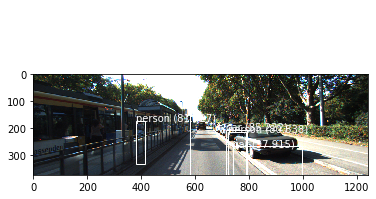

In [80]:
# draw what we found
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)